In [1]:
import torch
from diffusers import FluxPipeline

from nunchaku.models.transformers.transformer_flux_FB_cache import NunchakuFluxTransformer2dModel
from nunchaku.models.transformers.DFB_cache import *

In [2]:
device = torch.device("cuda")

In [3]:
transformer,m = NunchakuFluxTransformer2dModel.from_pretrained("mit-han-lab/svdq-int4-flux.1-dev")

[2025-04-07 16:50:46.773] [info] Initializing QuantizedFluxModel
[2025-04-07 16:50:46.843] [info] Loading weights from /home/ict04/.cache/huggingface/hub/models--mit-han-lab--svdq-int4-flux.1-dev/snapshots/3af964b97d298d4ed9da753edcc1ba3b322031f2/transformer_blocks.safetensors
[2025-04-07 16:50:49.211] [info] Done.


In [4]:
pipeline = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", transformer=transformer, torch_dtype=torch.bfloat16
).to("cuda")

Expected types for transformer: ['FluxTransformer2DModel'], got NunchakuFluxTransformer2dModel.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
#prompts = "A panda holding a sign that says hello world. Very realistic photo."


prompts = ["A panda drinking beer. Very realistic photo.",
           "A Welsh Corgi holding a sign that says hello world. Very realistic photo."]


#prompts = ["A panda drinking beer. Very realistic photo.",
#           "A Welsh Corgi holding a sign that says hello world. Very realistic photo.",
#       "A dragon holding a sign that says hello world. Very realistic photo."
#           ]

In [6]:
threshold_multi = 0.01
threshold_single = 0.01
adaptive_th = 0.9
USE_FBCahe = True
graph_save_path = "./results/FB_cahce.png"

In [7]:
with FBTransformerCacheContext() as fb_ctx:
    transformer.set_residual_diff_threshold(
        threshold_multi=threshold_multi,
        threshold_single=threshold_single,
        adaptive_th=adaptive_th,
        USE_FBCahe = USE_FBCahe
        )
    image = pipeline(prompts, num_inference_steps=50, guidance_scale=3.5)

  0%|          | 0/50 [00:00<?, ?it/s]

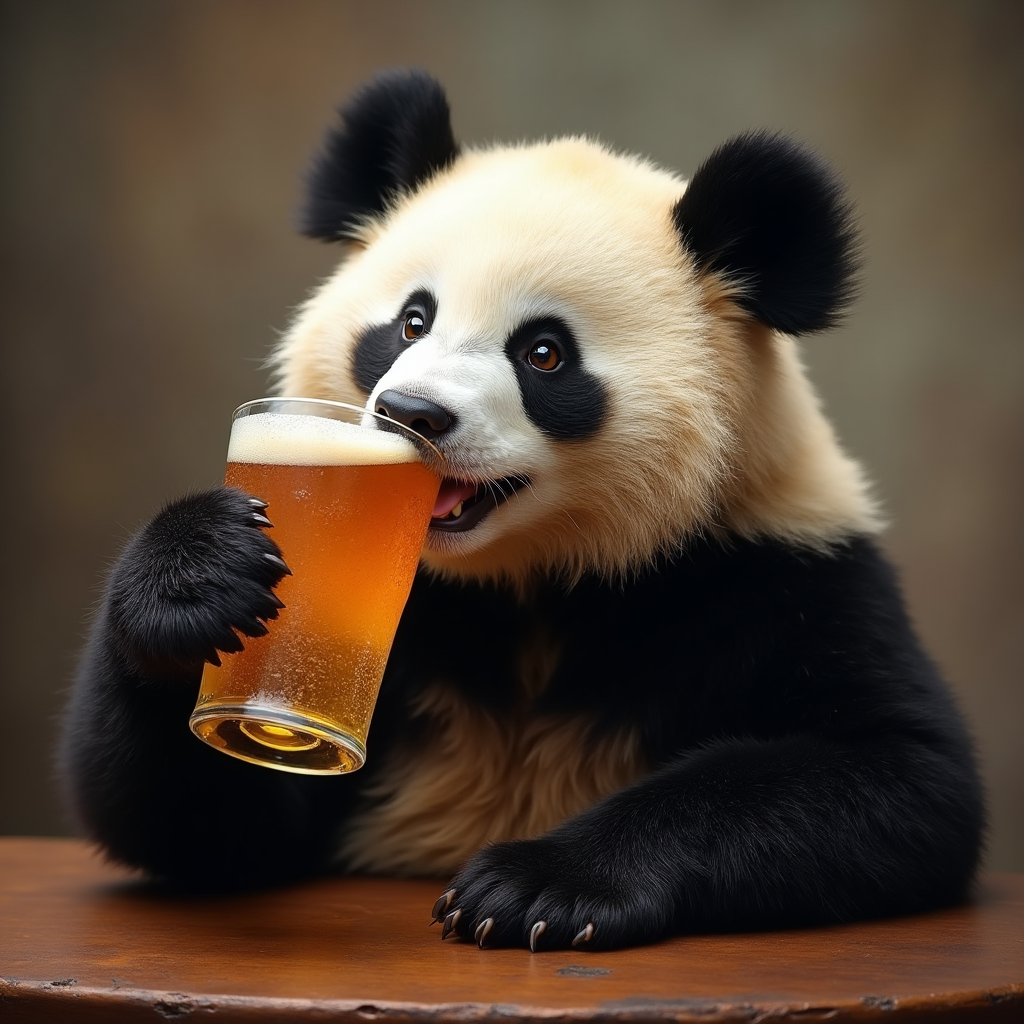

In [8]:
image[0][0]

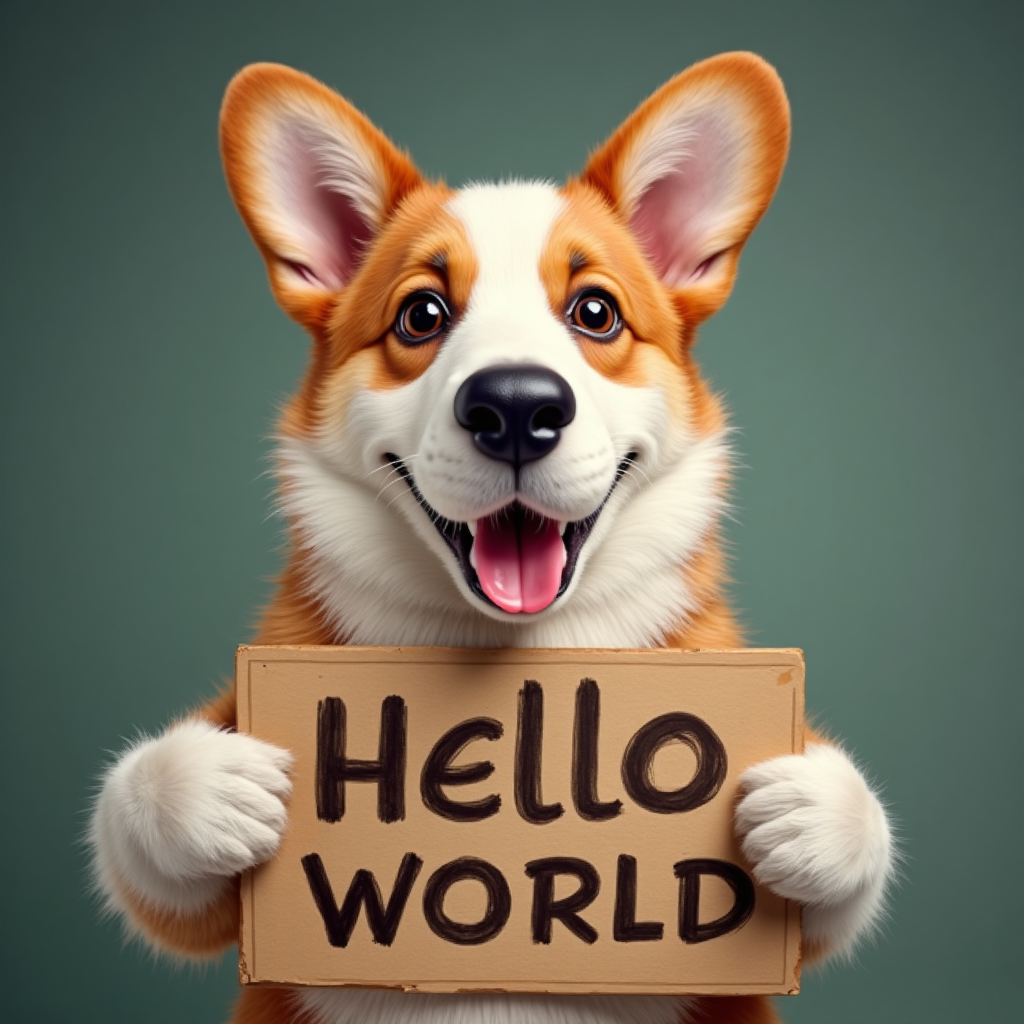

In [9]:
image[0][1]